In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
def calculate_overall_rmse(df):
    """
    Calculate the overall RMSE across x, y, z, and yaw compared to their reference values.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the actual values and reference values.
    
    Returns:
    float: The overall RMSE across all dimensions.
    """
    
    # Extract actual and reference values as numpy arrays
    actual_values = df[['x', 'y', 'z', 'psi']].to_numpy()
    reference_values = df[['x_ref', 'y_ref', 'z_ref', 'psi_ref']].to_numpy()
    
    # Compute the squared differences
    squared_errors = (actual_values - reference_values) ** 2
    
    # Compute the mean of the sum of squared differences across all dimensions
    mse = np.mean(np.sum(squared_errors, axis=1))
    
    # Return the square root of the mean squared error (overall RMSE)
    overall_rmse = np.sqrt(mse)
    
    return overall_rmse

In [124]:
log_file_path = 'newtest_f8h.log'
# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0)

# Display the first few rows to confirm successful import
df_log.head()

,time,vx,vy,vz,wx,wy,wz,x,y,z,...,x_ref,y_ref,z_ref,psi_ref,x_error,y_error,z_error,psi_error,solve_time,metadata
0,0.01,0.000477,-0.000113,3.067409e-08,0.000880,0.003708,0.000344,0.400000,-0.500000,-1.300000,...,0.499756,-0.624695,-1.3,0.000000,0.499279,-0.624582,-1.300000,-0.000880,44950000,1688.0
1,0.02,0.000954,-0.000226,8.419308e-08,0.001759,0.007412,0.000687,0.400005,-0.500001,-1.300000,...,0.501324,-0.623437,-1.3,0.004712,0.500370,-0.623211,-1.300000,0.002954,44950000,0.01
2,0.03,0.001765,-0.000398,7.141763e-05,0.003086,0.013702,0.001304,0.400014,-0.500003,-1.300000,...,0.502890,-0.622175,-1.3,0.009425,0.501124,-0.621778,-1.300071,0.006339,59874690,[[30]\n [30]\n [30]\n [20]]
3,0.04,0.002576,-0.000569,1.427802e-04,0.004409,0.019976,0.001921,0.400032,-0.500007,-1.299999,...,0.504452,-0.620909,-1.3,0.014137,0.501876,-0.620341,-1.300143,0.009728,59874690,0
4,0.05,0.003621,-0.000756,3.142469e-04,0.005849,0.028045,0.002756,0.400058,-0.500013,-1.299998,...,0.506011,-0.619639,-1.3,0.018850,0.502389,-0.618884,-1.300314,0.013001,60862183,0


In [125]:
# df_log['x_ref']
df_log['y_ref']

0      -0.624695
1      -0.623437
2      -0.622175
3      -0.620909
4      -0.619639
          ...   
1683   -0.152809
1684   -0.154782
1685   -0.156754
1686   -0.158725
1687   -0.160696
Name: y_ref, Length: 1688, dtype: float64

In [126]:
# df_log['x']
df_log['y']

0      -0.500000
1      -0.500001
2      -0.500003
3      -0.500007
4      -0.500013
          ...   
1683   -0.155944
1684   -0.157971
1685   -0.159996
1686   -0.162019
1687   -0.164040
Name: y, Length: 1688, dtype: float64

In [127]:
# print(f"This data comes from: {df_log['metadata'][0]}")
# print(f"Predictor was: {df_log['metadata'][1]}")
# print(f"(Valid for Nonlin predictor only) Predictor was: {df_log['metadata'][2]}")
# print(f"For yaw error we used: {df_log['metadata'][3]}")
print(f"RMSE: {calculate_overall_rmse(df_log)}")


RMSE: 0.37805771716808345


In [128]:
def plot_adjusted_avg_and_max_xyz_vs_reference(df):
    fig, axs = plt.subplots(4, 4, figsize=(20, 12), sharex=False)
    time_max = df['time'].max()
    time_min = df['time'].min()
    x_lim = (time_min-1, time_max+1)
    
    # Maximum values
    max_fx = 0.035
    max_fy = 0.035
    max_fz = 0.2
    max_tz = 0.001

    # Calculate average values
    avg_fx = df['fx'].mean()
    avg_fy = df['fy'].mean()
    avg_fz = df['fz'].mean()
    avg_tz = df['tauz'].mean()

    # Add some margin to cover both average and max values
    margin_fx = max(max_fx, abs(avg_fx)) * 1.2
    margin_fy = max(max_fy, abs(avg_fy)) * 1.2
    margin_fz = max(max_fz, abs(avg_fz)) * 1.2
    margin_tz = max(max_tz, abs(avg_tz)) * 1.2

    # Row 1: Plot x, y, z, psi vs references
    # plot x vs x_ref
    axs[0, 0].plot(df['time'], df['x'], label='x', color='red')
    axs[0, 0].plot(df['time'], df['x_ref'], label='x_ref', color='blue', linestyle='--')
    axs[0, 0].set_ylabel('x / x_ref')
    axs[0, 0].set_xlabel('time')
    axs[0, 0].legend()
    axs[0, 0].set_xlim(x_lim)

    # plot y vs y_ref
    axs[0, 1].plot(df['time'], df['y'], label='y', color='red')
    axs[0, 1].plot(df['time'], df['y_ref'], label='y_ref', color='blue', linestyle='--')
    axs[0, 1].set_ylabel('y / y_ref')
    axs[0, 1].set_xlabel('time')
    axs[0, 1].legend()
    axs[0, 1].set_xlim(x_lim)

    # plot z vs z_ref
    axs[0, 2].plot(df['time'], -1*df['z'], label='z', color='red')
    axs[0, 2].plot(df['time'], -1*df['z_ref'], label='z_ref', color='blue', linestyle='--')
    axs[0, 2].set_ylabel('z / z_ref')
    axs[0, 2].set_xlabel('time')
    axs[0, 2].legend()
    axs[0, 2].set_xlim(x_lim)
    axs[0, 2].set_ylim(0,-1*df['z'].min()+.8)


    # plot psi vs psi_ref
    axs[0, 3].plot(df['time'], df['psi'], label='psi', color='red')
    axs[0, 3].plot(df['time'], df['psi_ref'], label='psi_ref', color='blue', linestyle='--')
    axs[0, 3].set_ylabel('psi / psi_ref')
    axs[0, 3].set_xlabel('time')
    axs[0, 3].legend()
    axs[0, 3].set_xlim(x_lim)

    # Row 2: Plot cross comparisons (x vs y, x vs z, y vs z, time vs solve_time)
    # plot x vs y and x_ref vs y_ref
    axs[1, 0].plot(df['x'], df['y'], label='x vs y', color='red')
    axs[1, 0].plot(df['x_ref'], df['y_ref'], label='x_ref vs y_ref', color='blue', linestyle='--')
    axs[1, 0].set_ylabel('y')
    axs[1, 0].set_xlabel('x')
    axs[1, 0].legend()
    axs[1, 0].set_ylim(-.8,-1*df['y'].min()+.8)

    # plot x vs z and x_ref vs z_ref
    axs[1, 1].plot(df['x'], -1*df['z'], label='x vs z', color='red')
    axs[1, 1].plot(df['x_ref'], -1*df['z_ref'], label='x_ref vs z_ref', color='blue', linestyle='--')
    axs[1, 1].set_ylabel('z')
    axs[1, 1].set_xlabel('x')
    axs[1, 1].set_ylim(0,-1*df['z'].min()+.8)

    axs[1, 1].legend()

    # plot y vs z and y_ref vs z_ref
    axs[1, 2].plot(df['y'], -1*df['z'], label='y vs z', color='red')
    axs[1, 2].plot(df['y_ref'], -1*df['z_ref'], label='y_ref vs z_ref', color='blue', linestyle='--')
    axs[1, 2].set_ylabel('z')
    axs[1, 2].set_xlabel('y')
    axs[1, 2].set_ylim(0,-1*df['z'].min()+.1)

    axs[1, 2].legend()

    # plot time vs solve_time
    axs[1, 3].plot(df['time'], df['solve_time']* 1e-9, label='solve_time', color='purple')
    axs[1, 3].set_ylabel('solve_time')
    axs[1, 3].set_xlabel('time')
    axs[1, 3].legend()
    axs[1, 3].set_xlim(x_lim)

    # Row 3: Plot fx, fy, fz, tauz vs time
    # plot fx vs time
    axs[2, 0].plot(df['time'], df['fx'], label='fx', color='blue')
    axs[2, 0].axhline(y=max_fx, color='red', linestyle='--', label=f'+{max_fx}')
    axs[2, 0].axhline(y=-max_fx, color='red', linestyle='--', label=f'-{max_fx}')
    axs[2, 0].set_ylabel('fx')
    axs[2, 0].set_xlabel('time')
    axs[2, 0].legend()
    axs[2, 0].set_ylim((-margin_fx, margin_fx))
    axs[2, 0].set_xlim(x_lim)

    # plot fy vs time
    axs[2, 1].plot(df['time'], df['fy'], label='fy', color='orange')
    axs[2, 1].axhline(y=max_fy, color='red', linestyle='--', label=f'+{max_fy}')
    axs[2, 1].axhline(y=-max_fy, color='red', linestyle='--', label=f'-{max_fy}')
    axs[2, 1].set_ylabel('fy')
    axs[2, 1].set_xlabel('time')
    axs[2, 1].legend()
    axs[2, 1].set_ylim((-margin_fy, margin_fy))
    axs[2, 1].set_xlim(x_lim)

    # plot fz vs time
    axs[2, 2].plot(df['time'], df['fz'], label='fz', color='green')
    axs[2, 2].axhline(y=max_fz, color='red', linestyle='--', label=f'+{max_fz}')
    axs[2, 2].axhline(y=-max_fz, color='red', linestyle='--', label=f'-{max_fz}')
    axs[2, 2].set_ylabel('fz')
    axs[2, 2].set_xlabel('time')
    axs[2, 2].legend()
    axs[2, 2].set_ylim((-margin_fz, margin_fz))
    axs[2, 2].set_xlim(x_lim)

    # plot tauz vs time
    axs[2, 3].plot(df['time'], df['tauz'], label='tauz', color='purple')
    axs[2, 3].axhline(y=max_tz, color='red', linestyle='--', label=f'+{max_tz}')
    axs[2, 3].axhline(y=-max_tz, color='red', linestyle='--', label=f'-{max_tz}')
    axs[2, 3].set_ylabel('tauz')
    axs[2, 3].set_xlabel('time')
    axs[2, 3].legend()
    axs[2, 3].set_ylim((-margin_tz, margin_tz))
    axs[2, 3].set_xlim(x_lim)

    # # Row 4: Plot v_fx, v_fy, v_fz, v_tz vs time
    # # plot v_fx vs time
    # axs[3, 0].plot(df['time'], df['v_fx'], label='cbf_fx', color='blue')
    # axs[3, 0].set_ylabel('v_fx')
    # axs[3, 0].set_xlabel('time')
    # axs[3, 0].legend()
    # axs[3, 0].set_xlim(x_lim)

    # # plot v_fy vs time
    # axs[3, 1].plot(df['time'], df['v_fy'], label='cbf_fy', color='orange')
    # axs[3, 1].set_ylabel('v_fy')
    # axs[3, 1].set_xlabel('time')
    # axs[3, 1].legend()
    # axs[3, 1].set_xlim(x_lim)

    # # plot v_fz vs time
    # axs[3, 2].plot(df['time'], df['v_fz'], label='cbf_fz', color='green')
    # axs[3, 2].set_ylabel('v_fz')
    # axs[3, 2].set_xlabel('time')
    # axs[3, 2].legend()
    # axs[3, 2].set_xlim(x_lim)

    # # plot v_tz vs time
    # axs[3, 3].plot(df['time'], df['v_tz'], label='cbf_tauz', color='purple')
    # axs[3, 3].set_ylabel('v_tauz')
    # axs[3, 3].set_xlabel('time')
    # axs[3, 3].legend()
    # axs[3, 3].set_xlim(x_lim)
    

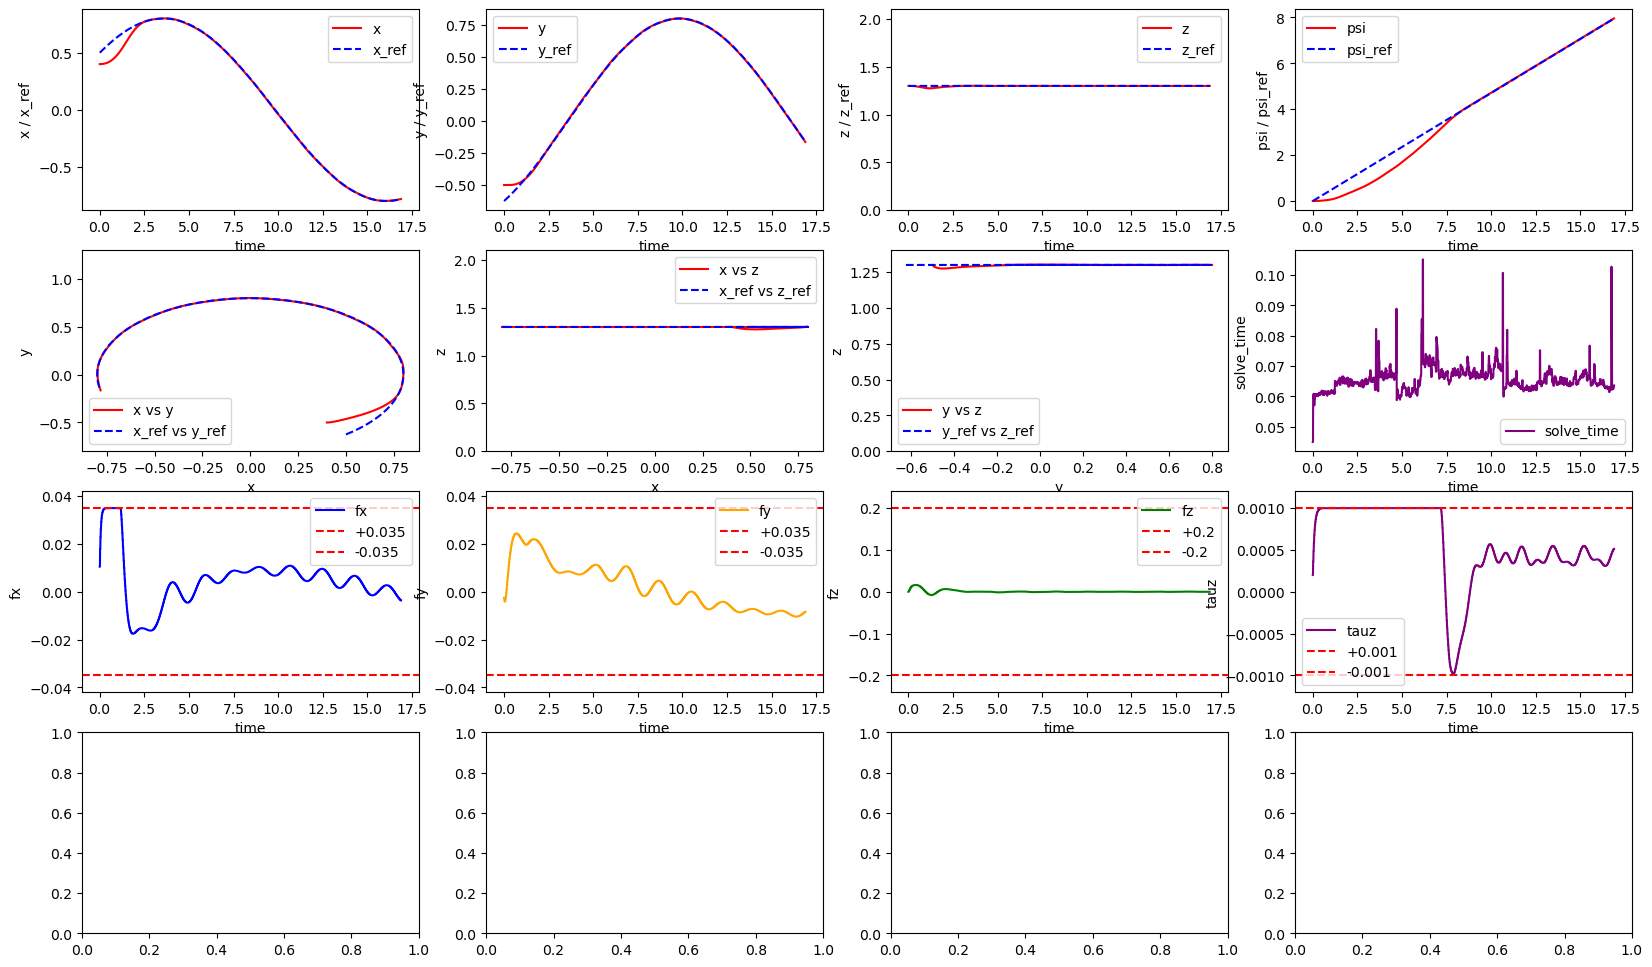

In [129]:
# Reuse the plotting function defined earlier for the uploaded .log data
plot_adjusted_avg_and_max_xyz_vs_reference(df_log)

In [130]:
df_log['psi_ref']

0       0.000000
1       0.004712
2       0.009425
3       0.014137
4       0.018850
          ...   
1683    7.930951
1684    7.935663
1685    7.940375
1686    7.945088
1687    7.949800
Name: psi_ref, Length: 1688, dtype: float64

In [131]:
TRACKING_TIME = 45
dT = 0.01
SETTLE_TIME = 2
tracking_time = np.arange(0, TRACKING_TIME, dT)
settle_time = np.arange(TRACKING_TIME, TRACKING_TIME + SETTLE_TIME + 1, dT)

desired_time = 45.0
tScale = desired_time / TRACKING_TIME
yaw_rotations_per_trajectory = 3

In [132]:
tracking_time

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 4.497e+01, 4.498e+01,
       4.499e+01])

In [133]:
traj_psi = np.array([2 * np.pi * tracking_time * yaw_rotations_per_trajectory / TRACKING_TIME]).reshape(-1)


In [134]:
traj_psi[-1]

18.845367131333973